# A Predictive Model To Find Out The Sales Of Each Product At A Particular Supermarket.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore warning (from sklearn and seaborn)

## Import Data

In [2]:
supermarket_data = pd.read_csv('train.csv')

# Display a sample of the data
supermarket_data.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [3]:
#Displaty the number of rows and columns
supermarket_data.shape

(4990, 13)

In [4]:
supermarket_data.describe()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Product_Supermarket_Sales
count,4188.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,12.908838,0.066916,391.803796,2004.783567,6103.520164
std,4.703256,0.053058,119.378259,8.283151,4447.333835
min,4.555000,0.000000,78.730000,1992.000000,83.230000
25%,8.767500,0.027273,307.890000,1994.000000,2757.660000
50%,12.600000,0.053564,393.860000,2006.000000,5374.675000
75%,17.100000,0.095358,465.067500,2011.000000,8522.240000
max,21.350000,0.328391,667.220000,2016.000000,32717.410000


In [5]:
supermarket_data.dtypes

Product_Identifier                 object
Supermarket_Identifier             object
Product_Supermarket_Identifier     object
Product_Weight                    float64
Product_Fat_Content                object
Product_Shelf_Visibility          float64
Product_Type                       object
Product_Price                     float64
Supermarket_Opening_Year            int64
Supermarket _Size                  object
Supermarket_Location_Type          object
Supermarket_Type                   object
Product_Supermarket_Sales         float64
dtype: object

In [6]:
#Remove Id columns
id_columns = ['Product_Identifier', 'Supermarket_Identifier', 'Product_Supermarket_Identifier']

new_data = supermarket_data.drop(id_columns, axis=1)

In [7]:
new_data.head()

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [8]:
new_data.shape

(4990, 10)

In [9]:
# Separate the columns that have categorical values and numerical values

cat_cols = ['Product_Fat_Content','Product_Type',
            'Supermarket _Size', 'Supermarket_Location_Type',
           'Supermarket_Type' ]

num_cols = ['Product_Weight', 'Product_Shelf_Visibility',
            'Product_Price', 'Supermarket_Opening_Year', 'Product_Supermarket_Sales']

# Visualizing The Data

Product_Supermarket_Sales is the target variable I am trying to predict, so I will focus my exploration on it.

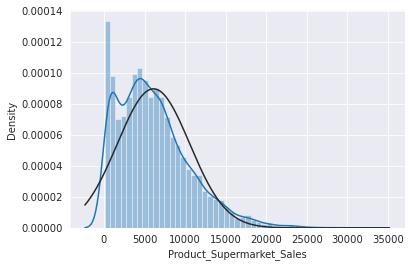

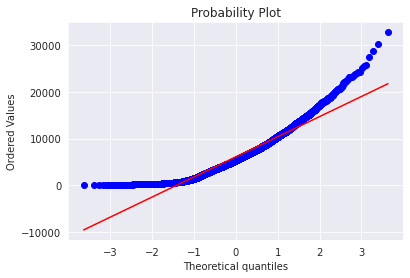

In [10]:
#Check the distribution
sns.distplot(new_data['Product_Supermarket_Sales'], fit=norm)
fig = plt.figure()
res = stats.probplot(new_data['Product_Supermarket_Sales'], plot=plt)

<AxesSubplot:>

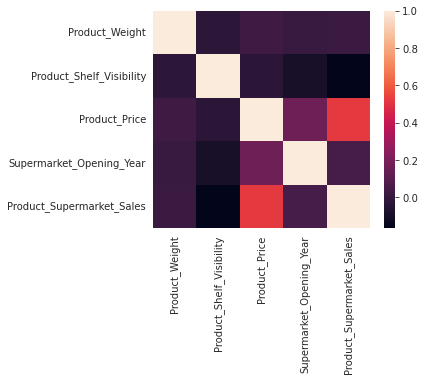

In [11]:
#CORRELATION MATRIX AMONG FEATURES
corrmat = new_data.corr()
f,ax = plt.subplots(figsize=(5,4))
sns.heatmap(corrmat, square=True)

<Figure size 432x288 with 0 Axes>

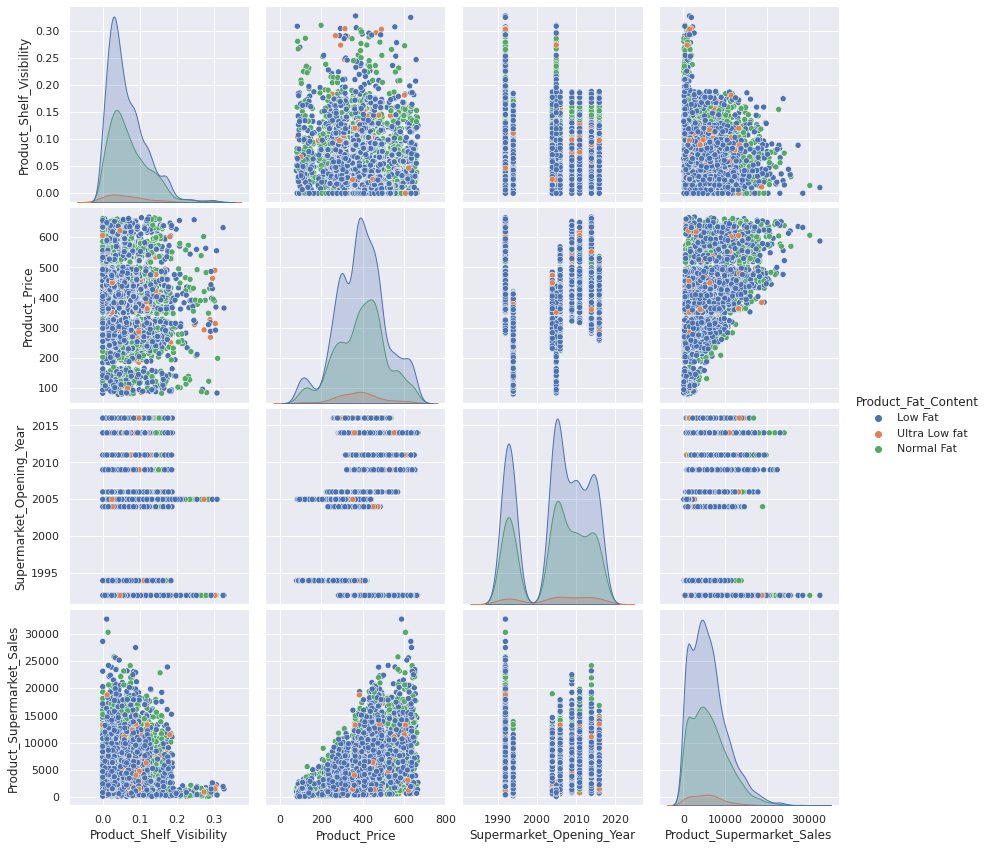

<Figure size 432x288 with 0 Axes>

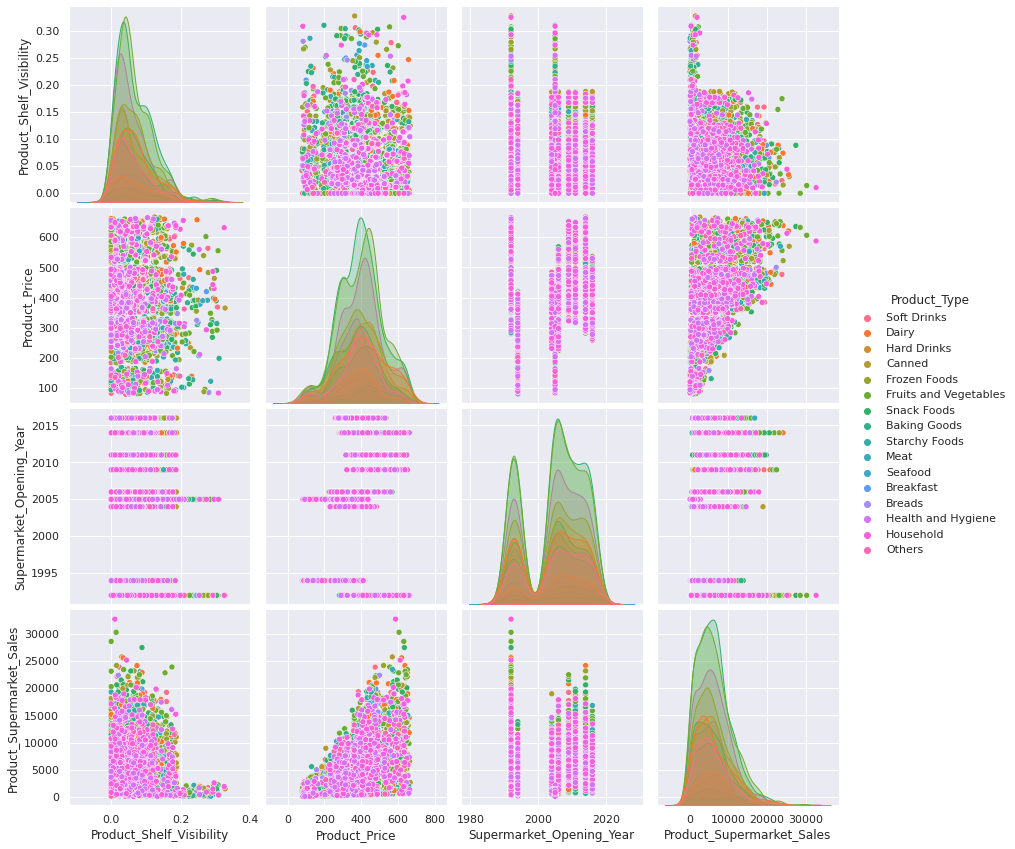

<Figure size 432x288 with 0 Axes>

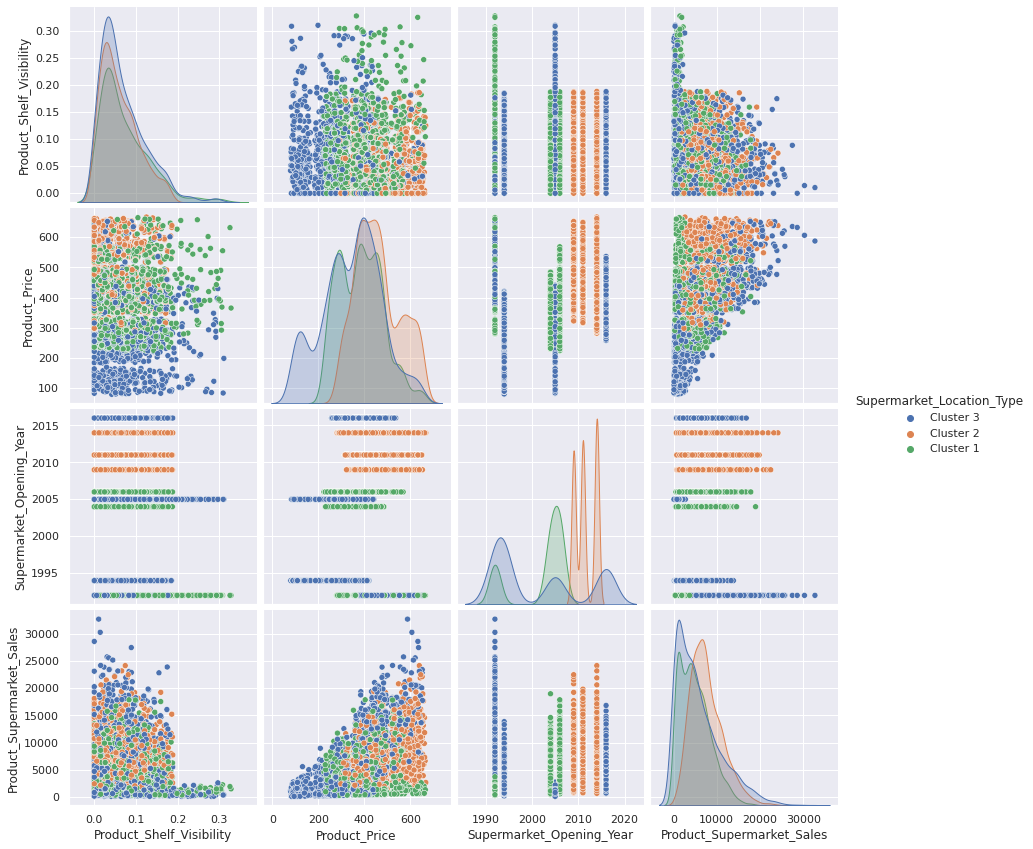

<Figure size 432x288 with 0 Axes>

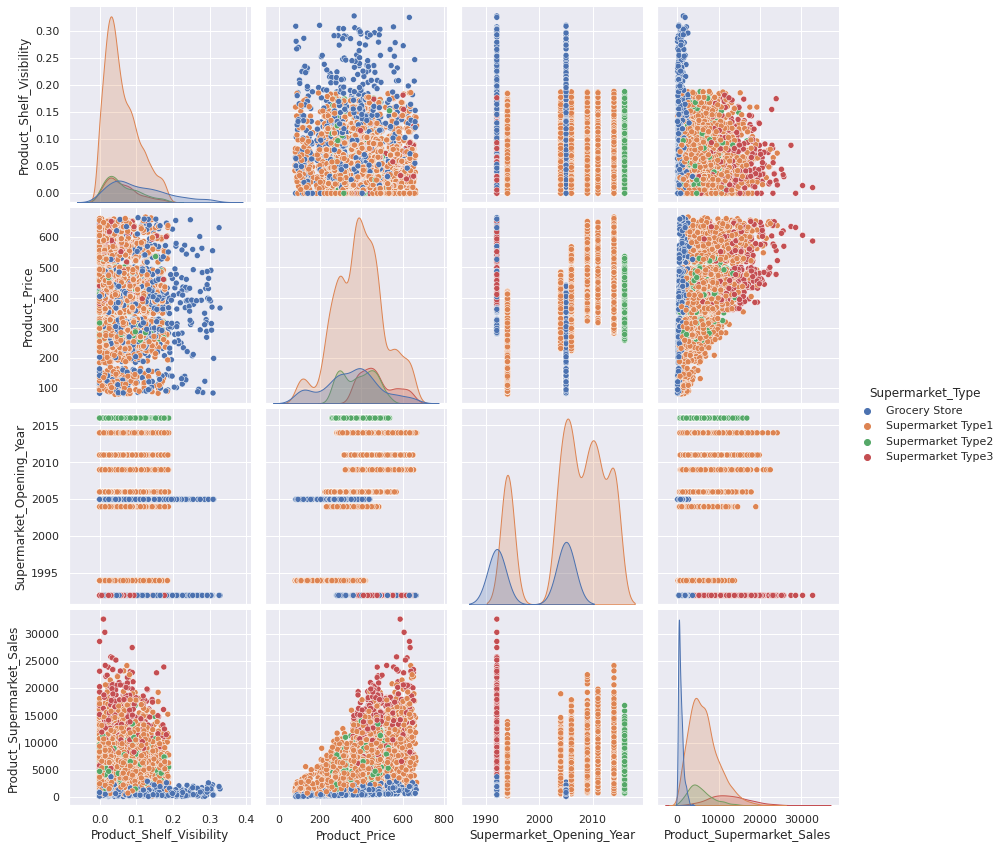

In [27]:
cat_cols_pair = ['Product_Fat_Content','Product_Type','Supermarket_Location_Type', 'Supermarket_Type' ]

cols_2_pair = ['Product_Fat_Content',
             'Product_Shelf_Visibility',
             'Product_Type',
             'Product_Price',
             'Supermarket_Opening_Year',
             'Supermarket_Location_Type',
             'Supermarket_Type',
             'Product_Supermarket_Sales']

for col in cat_cols_pair:
    sns.set()
    plt.figure()
    sns.pairplot(new_data[cols_2_pair], height=3.0, hue=col)
    plt.show()

## Dealing with missing data

In [12]:
#Get percentage of missing data
new_data_nan = (new_data.isnull().sum() / len(new_data)) * 100
new_data_nan = new_data_nan.drop(new_data_nan[new_data_nan == 0].index).sort_values(ascending=False)

missing_data = pd.DataFrame({'Missing Percentage' : new_data_nan})
missing_data

,Missing Percentage
Supermarket _Size,29.058116
Product_Weight,16.072144


So far we only have two columns with missing values.

Since our features are small, I studied the missing columns and came up with the following conclusion for the supermarket_size column.

Grocery store in cluster 1 has a store size of small Grocery store in cluster 3 has a store size of medium

Supermarket_Type_2 store in cluster 3 has a store size of medium

Supermarket_Type_3 store in cluster 3 has a store size of medium

Supermarket_Type_1 store in cluster 1 has a store size of medium

Supermarket_Type_1 store in cluster 2 has a store size of small Supermarket_Type_1 store in cluster 3 has a store size of high This info will be used to fill the empty cells in Supermarket_size column.

In [13]:
def fill_nan_supermarket_size(mkt_type, mk_location, val):
    temp_df = new_data['Supermarket _Size'].loc[(new_data['Supermarket_Type']==  mkt_type ) & (new_data['Supermarket_Location_Type'] == mk_location)]
    temp_df.fillna(value=val, axis=0, inplace=True)
    new_data['Supermarket _Size'].loc[(new_data['Supermarket_Type']== mkt_type) & (new_data['Supermarket_Location_Type'] == mk_location)] = temp_df
    return 'Done'

In [14]:
# Fill all nan in Supermarket_size according to categories
fill_nan_supermarket_size('Grocery Store','Cluster 3', 'Medium')
fill_nan_supermarket_size('Supermarket Type3','Cluster 3', 'Medium')
fill_nan_supermarket_size('Supermarket Type2','Cluster 3', 'Medium')
fill_nan_supermarket_size('Supermarket Type1','Cluster 3', 'High')
fill_nan_supermarket_size('Supermarket Type1','Cluster 2', 'Small')
fill_nan_supermarket_size('Supermarket Type1','Cluster 1', 'Medium')

'Done'

In [15]:
#Lets check the missing data percentage again
new_data_nan = (new_data.isnull().sum() / len(new_data)) * 100
new_data_nan = new_data_nan.drop(new_data_nan[new_data_nan == 0].index).sort_values(ascending=False)

missing_data = pd.DataFrame({'Missing Percentage' : new_data_nan})
missing_data

,Missing Percentage
Product_Weight,16.072144


# Feature Engineering

In [16]:
#Create the log version of product price
new_data['Product_Price_log'] = np.log1p(new_data['Product_Price'])
new_data['Product_Price_sqrt'] = np.sqrt(new_data['Product_Price'])
new_data['Product_Price_square'] = np.square(new_data['Product_Price'])


#Create some cross features
new_data['cross_Price_weight'] = new_data['Product_Price'] * new_data['Product_Weight']
new_data['cross_Price_visibility'] = new_data['Product_Price'] * new_data['Product_Shelf_Visibility']
new_data['cross_Price_visibility_weight'] = new_data['Product_Price'] * new_data['Product_Shelf_Visibility'] * new_data['Product_Weight']

In [17]:
#change opening year to categories
new_data['Supermarket_Opening_Year'].unique()

array([2005, 1994, 2014, 2016, 2011, 2009, 1992, 2006, 2004])

In [18]:
#Supermarket size is a categorical feature.

dict_mkt_size = {'Small':1,'Medium':2,'High': 3}
dict_fat_content = {'Ultra Low fat': 1,'Low Fat': 2,'Normal Fat':3}
dict_year = {2005:'A', 1994:'B', 2014:'C', 2016:'D', 2011:'E', 2009:'F', 1992:'G', 2006:'H', 2004:'I'}

new_data['Supermarket _Size'] = new_data['Supermarket _Size'].map(dict_mkt_size)
new_data['Product_Fat_Content'] = new_data['Product_Fat_Content'].map(dict_fat_content)
new_data['Supermarket_Opening_Year'] = new_data['Supermarket_Opening_Year'].map(dict_year)

# Handling The Categorical Features

In [19]:
for col in cat_cols:
    print('Value Count for', col)
    print(new_data[col].value_counts())
    print("---------------------------")

Value Count for Product_Fat_Content
2    3039
3    1773
1     178
Name: Product_Fat_Content, dtype: int64
---------------------------
Value Count for Product_Type
Snack Foods              758
Fruits and Vegetables    747
Household                567
Frozen Foods             457
Canned                   376
Dairy                    350
Baking Goods             344
Health and Hygiene       307
Meat                     264
Soft Drinks              261
Breads                   137
Hard Drinks              134
Others                   100
Starchy Foods             81
Breakfast                 66
Seafood                   41
Name: Product_Type, dtype: int64
---------------------------
Value Count for Supermarket _Size
1    2430
2    1966
3     594
Name: Supermarket _Size, dtype: int64
---------------------------
Value Count for Supermarket_Location_Type
Cluster 3    1940
Cluster 2    1581
Cluster 1    1469
Name: Supermarket_Location_Type, dtype: int64
---------------------------
Value Count 

The column with the highest number of classes is the Product_Type column (15). In this case we can use the one-hot-encoding scheme since our data is small (approx 5000) and the unique categories are also small.

Using the pandas get_dummies function when working smaller categories__

In [20]:
#saving the target value to a new variable
y_target = new_data['Product_Supermarket_Sales']
new_data.drop(['Product_Supermarket_Sales'], axis=1, inplace=True)

#one hot encode using pandas dummy function
dummified_data = pd.get_dummies(new_data)
dummified_data.head()

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Price,Supermarket _Size,Product_Price_log,Product_Price_sqrt,Product_Price_square,cross_Price_weight,cross_Price_visibility,...,Supermarket_Opening_Year_G,Supermarket_Opening_Year_H,Supermarket_Opening_Year_I,Supermarket_Location_Type_Cluster 1,Supermarket_Location_Type_Cluster 2,Supermarket_Location_Type_Cluster 3,Supermarket_Type_Grocery Store,Supermarket_Type_Supermarket Type1,Supermarket_Type_Supermarket Type2,Supermarket_Type_Supermarket Type3
0,11.6,2,0.068535,357.54,2,5.882040,18.908728,127834.8516,4147.464,24.504018,...,0,0,0,0,0,1,1,0,0,0
1,11.6,2,0.040912,355.79,3,5.877147,18.862396,126586.5241,4127.164,14.556018,...,0,0,0,0,0,1,0,1,0,0
2,11.6,2,0.041178,350.79,1,5.863034,18.729389,123053.6241,4069.164,14.444657,...,0,0,0,0,1,0,0,1,0,0
3,11.6,2,0.041113,355.04,2,5.875043,18.842505,126053.4016,4118.464,14.596651,...,0,0,0,0,0,1,0,0,1,0
4,11.6,1,0.000000,354.79,1,5.874341,18.835870,125875.9441,4115.564,0.000000,...,0,0,0,0,1,0,0,1,0,0


In [21]:
# Fill Missing Values

dummified_data.shape

(4990, 43)

In [41]:
#Print null columns
dummified_data.isnull().sum()

Product_Weight                           0
Product_Fat_Content                      0
Product_Shelf_Visibility                 0
Product_Price                            0
Supermarket _Size                        0
Product_Price_log                        0
Product_Price_sqrt                       0
Product_Price_square                     0
cross_Price_weight                     802
cross_Price_visibility                   0
cross_Price_visibility_weight          802
Product_Type_Baking Goods                0
Product_Type_Breads                      0
Product_Type_Breakfast                   0
Product_Type_Canned                      0
Product_Type_Dairy                       0
Product_Type_Frozen Foods                0
Product_Type_Fruits and Vegetables       0
Product_Type_Hard Drinks                 0
Product_Type_Health and Hygiene          0
Product_Type_Household                   0
Product_Type_Meat                        0
Product_Type_Others                      0
Product_Typ

In [42]:
# Compute the mean
mean_pw = dummified_data['Product_Weight'].mean()
mean_pw1 = dummified_data['cross_Price_weight'].mean()
mean_pw2 = dummified_data['cross_Price_visibility_weight'].mean()

#Fill the missing values with calculated mean
dummified_data['Product_Weight'].fillna(mean_pw, inplace=True)
dummified_data['cross_Price_weight'].fillna(mean_pw1, inplace=True)
dummified_data['cross_Price_visibility_weight'].fillna(mean_pw2, inplace=True)

In [43]:
#Check the new status
dummified_data.isnull().sum()

Product_Weight                         0
Product_Fat_Content                    0
Product_Shelf_Visibility               0
Product_Price                          0
Supermarket _Size                      0
Product_Price_log                      0
Product_Price_sqrt                     0
Product_Price_square                   0
cross_Price_weight                     0
cross_Price_visibility                 0
cross_Price_visibility_weight          0
Product_Type_Baking Goods              0
Product_Type_Breads                    0
Product_Type_Breakfast                 0
Product_Type_Canned                    0
Product_Type_Dairy                     0
Product_Type_Frozen Foods              0
Product_Type_Fruits and Vegetables     0
Product_Type_Hard Drinks               0
Product_Type_Health and Hygiene        0
Product_Type_Household                 0
Product_Type_Meat                      0
Product_Type_Others                    0
Product_Type_Seafood                   0
Product_Type_Sna

In [44]:
dummified_data_copy = dummified_data

# Split Data Into Train And Test Sets

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dummified_data, y_target, test_size = 0.3)

print("Training data is", X_train.shape)
print("Training target is", y_train.shape)
print("test data is", X_test.shape)
print("test target is", y_test.shape)

Training data is (3493, 43)
Training target is (3493,)
test data is (1497, 43)
test target is (1497,)


## Feature Normalization/Feature Scaling

In [46]:
from sklearn.preprocessing import RobustScaler, StandardScaler #Import scaler
scaler = RobustScaler() #create an object from RobustScaler

scaler.fit(X_train) #Fit to the train data only!

#Perform the transformation on train and test data
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

X_train[:5, :5] #Preview the first five rows and columns of train data

array([[ 0.        ,  1.        , -0.49110957,  0.1062238 , -1.        ],
       [-0.67609185,  0.        , -0.61602646, -0.11054499,  0.        ],
       [ 0.        ,  0.        ,  0.28632926,  1.52383102,  0.        ],
       [ 1.07067074,  0.        ,  0.0256339 , -0.6537891 , -1.        ],
       [ 1.09225348, -1.        , -0.43248499, -0.05417607,  0.        ]])

## Modelling The Data

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression 
import xgboost as xgb
import lightgbm as lgb

In [48]:
imp = SimpleImputer()
imp.fit(X_train)
train = imp.transform(X_train)
test = imp.transform(X_test)

The data set is small, I'll create/use a cross validation function and use the mean absolute error metric to measure the models true performance.

In [64]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score


def cross_validate(model, nfolds, feats, targets):
    score = -1 * (cross_val_score(model, feats, targets, cv=nfolds, scoring='neg_mean_absolute_error'))
    return np.mean(score)

In [69]:
def get_accuracy_score(x, y):
    y_pred = model.predict(x)
    return mean_absolute_error(y, y_pred)

## Starting with a Linear Regressor as a Baseline model

In [50]:
from sklearn.linear_model import LinearRegression 

lr_model = LinearRegression()
print("MAE Score: ", cross_validate(lr_model, 10, X_train, y_train))

MAE Score:  2209.7953320350416


In [70]:
model = LinearRegression()
model.fit(X_train,y_train)

In [72]:
get_accuracy_score(X_test, y_test)

2243.0337871804822

## Trying a Decision Tree

In [73]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth=6, min_samples_leaf=2, random_state=2)
print("MAE Score: ", cross_validate(dt_model, 10, X_train, y_train))

MAE Score:  2194.2796252956264


In [76]:
model = DecisionTreeRegressor(max_depth=6, min_samples_leaf=2, random_state=2)

model.fit(X_train,y_train)
get_accuracy_score(X_test, y_test)

2177.8851030604205

## Using Decision Tree as the new baseline model

Let's look at
## LightGBM

In [78]:
lgb_model = lgb.LGBMRegressor(n_estimators=300, max_depth=2, bagging_fraction=0.9, random_state=2)
print("MAE Sccore: ", cross_validate(lgb_model, 10, X_train, y_train))


[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 

In [79]:
model = lgb.LGBMRegressor(n_estimators=300, max_depth=2, bagging_fraction=0.9, random_state=2)

model.fit(X_train,y_train)
get_accuracy_score(X_test, y_test)

[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


2184.619395886396

In [80]:
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=3, subsample=0.8, random_state=2)
print("MAE Sccore: ", cross_validate(xgb_model, 10, X_train, y_train))

MAE Sccore:  2219.844233562091


In [83]:
model = xgb.XGBRegressor(n_estimators=90, max_depth=3, subsample=0.8, random_state=2)

model.fit(X_train,y_train)
get_accuracy_score(X_test, y_test)

2242.695767985505

## Using a Random Forest Regressor

In [84]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=2)
print("MAE Sccore: ", cross_validate(rf_model, 10, X_train, y_train))

MAE Sccore:  2125.9533128999183


In [85]:
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=2)

model.fit(X_train,y_train)
get_accuracy_score(X_test, y_test)

2134.6904439059017

In [ ]:
final_prediction = model.predict(test)

# Saving The Model

In [86]:
import pickle 

pickle_out = open("regressor.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()